In [23]:
!python -V

Python 3.6.10 :: Anaconda, Inc.


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [25]:
training = pd.read_csv('data/training.csv')

In [26]:
training[0:5]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [27]:
type(training)

pandas.core.frame.DataFrame

In [28]:
training['Image'].shape

(7049,)

In [29]:
first_example = training['Image'][0]
print('Type: ' + str(type(first_example)) + ' Len: ' + str(len(first_example)))

Type: <class 'str'> Len: 33593


In [30]:
first_example = np.fromstring(first_example, sep=' ')
first_example.shape

(9216,)

In [31]:
first_example = np.reshape(first_example, newshape=(96,96))

In [32]:
def convert_to_image(index):
    
    example = training['Image'][index]     
    example = np.fromstring(example, sep=' ')
    example = example.reshape((96,96))
    
    print('Converted to Image with dim: ' + str(example.shape))
    
    return example
    

In [33]:
def display_image(image):
    
    figure, axes = plt.subplots()
    
    axes.imshow(image)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.show()


Converted to Image with dim: (96, 96)


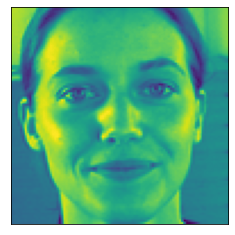

In [34]:
display_image(convert_to_image(9))

In [35]:
## Now convert all the images to np array

training['Image'] = [np.fromstring(image, sep=' ') for image in training['Image']]
    

In [36]:
print('Type: ' + str(type(training['Image'][0])) + ' Len: ' + str(len(training['Image'][0])))

Type: <class 'numpy.ndarray'> Len: 9216


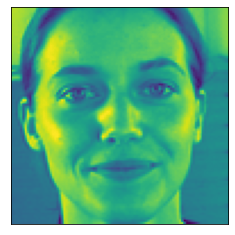

In [37]:
display_image(training['Image'][9].reshape((96,96)))

In [38]:
## converting the column values into a (x,y) coordinate system

columns = training.columns[:-1]  # selecting the right columns (i.e. first 30)

data = list(training.loc[[0], list(columns)].values[0])   # will get the values of these 30 columns in a list

# grouping them into a tuple of two to indicate (x,y) coordinate on the image

data = [(data[i], data[i+1]) for i in range(0, len(data), 2)]

data

[(66.0335639098, 39.0022736842),
 (30.2270075188, 36.4216781955),
 (59.582075188000005, 39.647422556399995),
 (73.1303458647, 39.9699969925),
 (36.3565714286, 37.3894015038),
 (23.4528721805, 37.3894015038),
 (56.9532631579, 29.0336481203),
 (80.2271278195, 32.2281383459),
 (40.2276090226, 29.0023218045),
 (16.3563789474, 29.6474706767),
 (44.4205714286, 57.0668030075),
 (61.1953082707, 79.9701654135),
 (28.6144962406, 77.38899248119999),
 (43.3126015038, 72.9354586466),
 (43.1307067669, 84.4857744361)]

In [39]:
# converting above cell to a function
# this will convert the column values into a coordinate system for 2-d array/image

def convert_to_coordinates(index):
    
    columns = training.columns[:-1]

    data = list(training.loc[[index], list(columns)].values[0])   

    data = [(data[i], data[i+1]) for i in range(0, len(data), 2)]

    return data


def get_image(index):
    ''' Takes index of the Image column and reshapes the numpy array to the appropiate size i.e 96*96 '''
    
    return training['Image'][index].reshape((96,96))

In [41]:
# creating a comprehensive function which takes index and plots the image.
# This is just an amalgamation of all the work till now

def display_image(index):
    
    figure, axes = plt.subplots()  # creating the canvas
    
    image = get_image(index) # plotting image
    
    axes.imshow(image)
    
    coordinates = convert_to_coordinates(index) # getting the (x,y) coordinates an dplotting them    
    for i in range(len(coordinates)):
        axes.scatter(coordinates[i][0], coordinates[i][1], s=10, c='b', marker="s")
        
    plt.xticks([])
    plt.yticks([])
    plt.show()


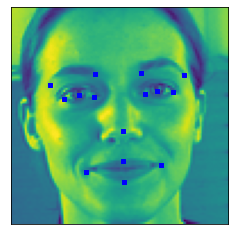

In [42]:
display_image(9)

In [43]:
# Till now we know 2 things about the model:
# 1) It will have 9216 vector as the input
# 2) The output will be the 30 column vector

## We are almost ready for the modelling the network 
## but first we need to rake care of bad training data which will hurt our model.

training.count()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [64]:
## Making the final dataset for training
## Particularly, we will scale the values of all 30 columns to -1, 1

training = training[training.columns].dropna()  # getting the final subset of the data

training.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [125]:
x_train = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0], 96, 96, 1)
print('Shape: ', str(x_train.shape), ' Type: ' + str(type(x_train)))

Shape:  (2140, 96, 96, 1)  Type: <class 'numpy.ndarray'>


In [126]:
y_train = train.drop('Image', axis=1)
y_train = y_train.to_numpy()

print('Shape: ', str(y_train.shape), ' Type: ' + str(type(y_train)))

Shape:  (2140, 30)  Type: <class 'numpy.ndarray'>


In [127]:
x_train

array([[[[238],
         [236],
         [237],
         ...,
         [250],
         [250],
         [250]],

        [[235],
         [238],
         [236],
         ...,
         [249],
         [250],
         [251]],

        [[237],
         [236],
         [237],
         ...,
         [251],
         [251],
         [250]],

        ...,

        [[186],
         [183],
         [181],
         ...,
         [ 52],
         [ 57],
         [ 60]],

        [[189],
         [188],
         [207],
         ...,
         [ 61],
         [ 69],
         [ 78]],

        [[191],
         [184],
         [184],
         ...,
         [ 70],
         [ 75],
         [ 90]]],


       [[[219],
         [215],
         [204],
         ...,
         [ 92],
         [ 88],
         [ 84]],

        [[222],
         [219],
         [220],
         ...,
         [ 92],
         [ 88],
         [ 86]],

        [[231],
         [224],
         [212],
         ...,
         [ 77],
         [

In [128]:
y_train

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [68.43086625, 38.65197512, 28.89585706, ..., 79.04312978,
        47.17673868, 89.54452244],
       [64.15217959, 30.69159184, 27.00089796, ..., 79.30142857,
        58.61108571, 80.35554286],
       [66.6837551 , 34.48342857, 30.7844898 , ..., 75.96359236,
        52.92337132, 82.66106175]])

In [144]:
model = tf.keras.Sequential(name='face_detection')

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(96,96,1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(30, name='output'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mae'])

model.summary()

Model: "face_detection"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
batch_normalization_32 (Batc (None, 94, 94, 32)        128       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 92, 92, 32)        9248      
_________________________________________________________________
batch_normalization_33 (Batc (None, 92, 92, 32)        128       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 44, 44, 64)        18496     
_________________________________________________________________
batch_normalization_34 (Batc (None, 44, 44, 64)     

In [145]:
model.fit(x=x_train, y=y_train, epochs=100, validation_split=0.3)

Epoch 1/100
47/47 [==============================] - 81s 2s/step - loss: 383.3694 - accuracy: 0.5648 - mae: 11.7084 - val_loss: 880.7824 - val_accuracy: 0.4579 - val_mae: 27.1577
Epoch 2/100
47/47 [==============================] - 99s 2s/step - loss: 13.1552 - accuracy: 0.8044 - mae: 2.7647 - val_loss: 259.3196 - val_accuracy: 0.4564 - val_mae: 14.0085
Epoch 3/100
47/47 [==============================] - 100s 2s/step - loss: 10.5932 - accuracy: 0.8117 - mae: 2.5103 - val_loss: 94.9725 - val_accuracy: 0.4595 - val_mae: 7.8025
Epoch 4/100
47/47 [==============================] - 90s 2s/step - loss: 9.6529 - accuracy: 0.8117 - mae: 2.3980 - val_loss: 57.2230 - val_accuracy: 0.4595 - val_mae: 5.4948
Epoch 5/100
47/47 [==============================] - 90s 2s/step - loss: 8.6358 - accuracy: 0.8077 - mae: 2.2759 - val_loss: 33.8569 - val_accuracy: 0.4611 - val_mae: 3.8158
Epoch 6/100
47/47 [==============================] - 99s 2s/step - loss: 7.7129 - accuracy: 0.8151 - mae: 2.1408 - val_l

Epoch 48/100
47/47 [==============================] - 87s 2s/step - loss: 3.3176 - accuracy: 0.8899 - mae: 1.4083 - val_loss: 25.1883 - val_accuracy: 0.5234 - val_mae: 2.9928
Epoch 49/100
47/47 [==============================] - 87s 2s/step - loss: 3.4126 - accuracy: 0.8919 - mae: 1.4193 - val_loss: 24.3728 - val_accuracy: 0.5109 - val_mae: 2.9815
Epoch 50/100
47/47 [==============================] - 90s 2s/step - loss: 3.5798 - accuracy: 0.8999 - mae: 1.4659 - val_loss: 22.8275 - val_accuracy: 0.4813 - val_mae: 2.9555
Epoch 51/100
47/47 [==============================] - 106s 2s/step - loss: 3.3428 - accuracy: 0.8785 - mae: 1.4075 - val_loss: 26.6840 - val_accuracy: 0.5296 - val_mae: 3.1329
Epoch 52/100
47/47 [==============================] - 90s 2s/step - loss: 3.4648 - accuracy: 0.8899 - mae: 1.4395 - val_loss: 23.3061 - val_accuracy: 0.5031 - val_mae: 3.0173
Epoch 53/100
47/47 [==============================] - 86s 2s/step - loss: 3.3467 - accuracy: 0.8832 - mae: 1.3988 - val_loss

Epoch 95/100
47/47 [==============================] - 92s 2s/step - loss: 3.6060 - accuracy: 0.8845 - mae: 1.4796 - val_loss: 27.3621 - val_accuracy: 0.5047 - val_mae: 3.1928
Epoch 96/100
47/47 [==============================] - 103s 2s/step - loss: 3.2186 - accuracy: 0.8865 - mae: 1.3854 - val_loss: 23.8236 - val_accuracy: 0.5156 - val_mae: 2.8497
Epoch 97/100
47/47 [==============================] - 88s 2s/step - loss: 3.1646 - accuracy: 0.8965 - mae: 1.3683 - val_loss: 30.9111 - val_accuracy: 0.5280 - val_mae: 3.3368
Epoch 98/100
47/47 [==============================] - 89s 2s/step - loss: 3.1874 - accuracy: 0.8925 - mae: 1.3719 - val_loss: 26.9466 - val_accuracy: 0.5016 - val_mae: 3.1183
Epoch 99/100
47/47 [==============================] - 89s 2s/step - loss: 3.0961 - accuracy: 0.8852 - mae: 1.3617 - val_loss: 27.3343 - val_accuracy: 0.4938 - val_mae: 3.1129
Epoch 100/100
47/47 [==============================] - 107s 2s/step - loss: 3.1678 - accuracy: 0.9065 - mae: 1.3668 - val_lo

In [146]:
model.save('face-keypoint-detection.h5')

In [151]:
model = tf.keras.Sequential(name='face_detection_1')

model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3,3),padding='same', use_bias=False))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128, (3,3),padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(30))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mae'])

model.summary()

Model: "face_detection_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 48, 48, 32)   

In [152]:
model.fit(x=x_train, y=y_train, epochs=100, validation_split=0.3)

Epoch 1/100
47/47 [==============================] - 202s 4s/step - loss: 186.9767 - accuracy: 0.5501 - mae: 8.1803 - val_loss: 274.0431 - val_accuracy: 0.4564 - val_mae: 14.9826
Epoch 2/100
47/47 [==============================] - 177s 4s/step - loss: 22.6841 - accuracy: 0.6395 - mae: 3.7689 - val_loss: 114.9558 - val_accuracy: 0.4564 - val_mae: 9.4880
Epoch 3/100
47/47 [==============================] - 189s 4s/step - loss: 19.1869 - accuracy: 0.6389 - mae: 3.4623 - val_loss: 56.6281 - val_accuracy: 0.4564 - val_mae: 6.3192
Epoch 4/100
47/47 [==============================] - 194s 4s/step - loss: 16.0222 - accuracy: 0.7056 - mae: 3.1674 - val_loss: 40.7100 - val_accuracy: 0.4595 - val_mae: 5.2759
Epoch 5/100
47/47 [==============================] - 171s 4s/step - loss: 15.1475 - accuracy: 0.7230 - mae: 3.0825 - val_loss: 14.8494 - val_accuracy: 0.4579 - val_mae: 2.8373
Epoch 6/100
47/47 [==============================] - 202s 4s/step - loss: 16.3576 - accuracy: 0.7430 - mae: 3.1880 -

Epoch 48/100
47/47 [==============================] - 174s 4s/step - loss: 4.6148 - accuracy: 0.8645 - mae: 1.6621 - val_loss: 8.4393 - val_accuracy: 0.5093 - val_mae: 2.0765
Epoch 49/100
47/47 [==============================] - 198s 4s/step - loss: 4.0598 - accuracy: 0.8551 - mae: 1.5545 - val_loss: 8.2166 - val_accuracy: 0.5171 - val_mae: 1.9980
Epoch 50/100
47/47 [==============================] - 170s 4s/step - loss: 4.2089 - accuracy: 0.8585 - mae: 1.5780 - val_loss: 8.3483 - val_accuracy: 0.5405 - val_mae: 2.0337
Epoch 51/100
47/47 [==============================] - 201s 4s/step - loss: 4.3640 - accuracy: 0.8798 - mae: 1.6121 - val_loss: 8.8483 - val_accuracy: 0.5140 - val_mae: 2.1418
Epoch 52/100
47/47 [==============================] - 172s 4s/step - loss: 4.1852 - accuracy: 0.8852 - mae: 1.5751 - val_loss: 8.0885 - val_accuracy: 0.5234 - val_mae: 2.0157
Epoch 53/100
47/47 [==============================] - 190s 4s/step - loss: 3.9876 - accuracy: 0.8732 - mae: 1.5367 - val_loss

Epoch 95/100
47/47 [==============================] - 109s 2s/step - loss: 3.6829 - accuracy: 0.8838 - mae: 1.4772 - val_loss: 7.3203 - val_accuracy: 0.5436 - val_mae: 1.9025
Epoch 96/100
47/47 [==============================] - 96s 2s/step - loss: 3.0659 - accuracy: 0.9005 - mae: 1.3500 - val_loss: 7.7730 - val_accuracy: 0.5607 - val_mae: 1.9518
Epoch 97/100
47/47 [==============================] - 96s 2s/step - loss: 3.0079 - accuracy: 0.9119 - mae: 1.3318 - val_loss: 7.3438 - val_accuracy: 0.5202 - val_mae: 1.8963
Epoch 98/100
47/47 [==============================] - 117s 2s/step - loss: 3.3476 - accuracy: 0.8919 - mae: 1.4143 - val_loss: 7.5801 - val_accuracy: 0.4984 - val_mae: 1.9523
Epoch 99/100
47/47 [==============================] - 98s 2s/step - loss: 3.1376 - accuracy: 0.8885 - mae: 1.3591 - val_loss: 7.2943 - val_accuracy: 0.5296 - val_mae: 1.8953
Epoch 100/100
47/47 [==============================] - 102s 2s/step - loss: 3.1263 - accuracy: 0.8972 - mae: 1.3654 - val_loss: 

In [153]:
model.save('facial-keypoint-keypoint2.h5')

In [155]:
#### Will test against the test data ####

test = pd.read_csv('data/test.csv')

test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [163]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

test.head()

,ImageId,Image
0,1,"[[182, 183, 182, 182, 180, 180, 176, 169, 156,..."
1,2,"[[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, ..."
2,3,"[[177, 176, 174, 170, 169, 169, 168, 166, 166,..."
3,4,"[[176, 174, 174, 175, 174, 174, 176, 176, 175,..."
4,5,"[[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, ..."


In [182]:
test['Image'][0].shape

(96, 96)

In [183]:
x_test = np.asarray([test['Image']], dtype=np.uint8).reshape(test['Image'].shape[0], 96, 96, 1)
x_test.shape

(1783, 96, 96, 1)

In [ ]:
y_test = model.predict(x_test)

In [172]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train Score : ' + str(score)) 

Train Score : [3.1600341796875, 0.7644859552383423, 1.144084095954895]


In [173]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score : ' + str(score)) 

Test Score : [0.0, 1.0, 0.0]


In [174]:
y_test.shape

(1783, 30)

In [187]:
y_test[0]

array([65.5683  , 37.174576, 28.133385, 36.470966, 59.474182, 37.69864 ,
       71.86625 , 38.543358, 34.958305, 37.16123 , 22.392906, 37.04811 ,
       57.38897 , 25.683569, 78.8156  , 28.445728, 37.77484 , 24.511911,
       15.695461, 26.259916, 48.83922 , 50.56379 , 61.90183 , 75.01956 ,
       32.630993, 75.36266 , 47.70791 , 66.568695, 47.42933 , 85.04268 ],
      dtype=float32)

In [188]:
# converting above cell to a function
# this will convert the column values into a coordinate system for 2-d array/image

def convert_to_coordinates(index):

    data = y_test[index]

    data = [(data[i], data[i+1]) for i in range(0, len(data), 2)]

    return data

In [189]:
def display_image(index):
    
    figure, axes = plt.subplots()  # creating the canvas
    
    image = test['Image'][index] # plotting image
    
    axes.imshow(image)
    
    coordinates = convert_to_coordinates(index) # getting the (x,y) coordinates an dplotting them    
    for i in range(len(coordinates)):
        axes.scatter(coordinates[i][0], coordinates[i][1], s=10, c='b', marker="s")
        
    plt.xticks([])
    plt.yticks([])
    plt.show()

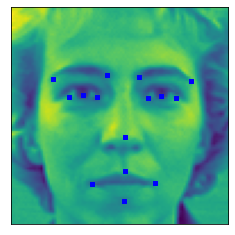

In [199]:
display_image(11)    ### from imported model (https://www.kaggle.com/liudmyla/easy-keras-facial-keypoint-detection/notebook)

In [202]:
model = tf.keras.models.load_model('face-keypoint-detection.h5')   # from my model

In [204]:
y_test = model.predict(x_test)

In [205]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train Score : ' + str(score)) 

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score : ' + str(score)) 

y_test.shape

Train Score : [8.739775657653809, 0.80467289686203, 1.45469331741333]
Test Score : [0.0, 1.0, 0.0]


(1783, 30)

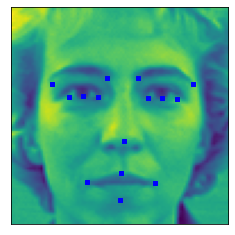

In [206]:
display_image(11)

In [208]:
lookup_table = pd.read_csv('data/IdLookupTable.csv')

In [209]:
lookup_table.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [221]:
y_sub = pd.DataFrame(y_test, columns=list(training.columns[:-1]))

In [222]:
for i in range(lookup_table.shape[0]):
    lookup_table.Location[i] = y_sub.loc[lookup_table.ImageId[i]-1][lookup_table.FeatureName[i]]

C:\Users\pshar\.conda\envs\facial-keypoint\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [247]:
SampleSubmission = pd.read_csv('data/SampleSubmission.csv')

In [248]:
SampleSubmission.Location = lookup_table.Location

mySubmission = SampleSubmission

In [250]:
mySubmission.to_csv('submission.csv', index=False)